In [1]:
import pandas as pd
import pickle

# Import law_prep_dtm
law_prep_dtm = pd.read_pickle('D:/Portofolio/Indonesian-Controversial-Laws-Wordcloud/pickle/law_prep_dtm.pkl')
law_prep_dtm = law_prep_dtm.transpose()
law_prep_dtm

,2019-19,2020-11,2020-2,2020-3,2020-7,2022-12
aaii,0,1,0,0,0,0
abadi,0,3,0,0,0,0
acceptance,0,1,0,0,0,0
aceh,0,1,0,1,0,0
adaiah,0,1,0,2,0,0
...,...,...,...,...,...,...
zonasi,0,0,0,1,0,0
zonasr,0,1,0,0,0,0
zoonosis,0,1,0,0,0,0
zorla,0,1,0,0,0,0


In [2]:
# Untuk mengetahui kata yang termasuk umum di dalam uu_dtm
dict_kata_umum = {}
# u for umum
for kata in law_prep_dtm.columns:
    umum = law_prep_dtm[kata].sort_values(ascending=False).head(30)
    dict_kata_umum[kata]= list(zip(umum.index, umum.values))

dict_kata_umum

{'2019-19': [('moral', 4),
  ('ditetapkan', 4),
  ('pemberhentian', 4),
  ('asasi', 4),
  ('kejahatan', 4),
  ('memperoleh', 4),
  ('barang', 4),
  ('eksekutif', 4),
  ('kode', 4),
  ('lambat', 4),
  ('rohani', 4),
  ('berkaitan', 4),
  ('integritas', 4),
  ('koordinasi', 4),
  ('mengumumkan', 4),
  ('pejabat', 4),
  ('dipertanggungjawabkan', 4),
  ('sehat', 4),
  ('manusia', 4),
  ('proses', 4),
  ('perkara', 4),
  ('jasmani', 4),
  ('mengundurkan', 4),
  ('bersifat', 4),
  ('sumpah', 4),
  ('kegiatan', 4),
  ('memerintahkan', 4),
  ('wewenangnya', 4),
  ('lulus', 3),
  ('berpendidikan', 3)],
 '2020-11': [('batam', 4),
  ('komponennya', 4),
  ('rpplh', 4),
  ('pemetaan', 4),
  ('penimbangan', 4),
  ('majelis', 4),
  ('berlangganan', 4),
  ('ruangnya', 4),
  ('dihadapi', 4),
  ('kebudayaan', 4),
  ('menyerap', 4),
  ('iklan', 4),
  ('tistrik', 4),
  ('kolam', 4),
  ('lurus', 4),
  ('berkurangnya', 4),
  ('tindih', 4),
  ('pemukiman', 4),
  ('operasinya', 4),
  ('inkubasi', 4),
  ('terb

In [3]:
# Mengetahui kata paling banyak digunakan dalam setiap kategori
for kategori, kata_terbanyak in dict_kata_umum.items():
    print(kategori)
    print(', '.join([word for word, count in kata_terbanyak[0:15]]))
    print('---')

2019-19
moral, ditetapkan, pemberhentian, asasi, kejahatan, memperoleh, barang, eksekutif, kode, lambat, rohani, berkaitan, integritas, koordinasi, mengumumkan
---
2020-11
batam, komponennya, rpplh, pemetaan, penimbangan, majelis, berlangganan, ruangnya, dihadapi, kebudayaan, menyerap, iklan, tistrik, kolam, lurus
---
2020-2
covtd, beserta, antisipasi, kepabeanan, diundangkan, pembebasan, safetg, meliputi, periode, keberatan, pelaku, nasabah, ralryat, permohonan, kahar
---
2020-3
prinsip, perindustrian, memuat, karya, proses, wilayahnya, bertanggung, endapan, batasan, radioaktif, dinyatakan, fusat, penyiapan, penyelesaian, proyek
---
2020-7
diberhentikan, menjalankan, ditetapkan, teknis, majelis, tercela, penetapan, menjabat, permintaan, peradilan, calon, kekuatan, kehormatan, belas, penjelasan
---
2022-12
barang, penilaian, majelis, didukung, kontrasepsi, pornografi, memuat, bersifat, miliar, kantor, tata, persidangan, persetujuan, kehendak, penghapusan
---


In [4]:
# Mencari kata paling umum yang lazim digunakan disemua kategori
# note : walaupun ada 22 kategori yang tidak menyimpan uu
from collections import Counter
kata_umum = []
for doc in law_prep_dtm.columns:
    #print(doc)
    umum = [word for (word, count) in dict_kata_umum[doc]]
    for kata in umum:
        kata_umum.append(kata)
len(kata_umum)

180

In [5]:
# Menggabungkan jumlah kata terbanyak di dalam data
kata_umum_combined = Counter(kata_umum).most_common()
kata_umum_combined

[('majelis', 3),
 ('ditetapkan', 2),
 ('barang', 2),
 ('pejabat', 2),
 ('proses', 2),
 ('bersifat', 2),
 ('diundangkan', 2),
 ('pelaku', 2),
 ('memuat', 2),
 ('moral', 1),
 ('pemberhentian', 1),
 ('asasi', 1),
 ('kejahatan', 1),
 ('memperoleh', 1),
 ('eksekutif', 1),
 ('kode', 1),
 ('lambat', 1),
 ('rohani', 1),
 ('berkaitan', 1),
 ('integritas', 1),
 ('koordinasi', 1),
 ('mengumumkan', 1),
 ('dipertanggungjawabkan', 1),
 ('sehat', 1),
 ('manusia', 1),
 ('perkara', 1),
 ('jasmani', 1),
 ('mengundurkan', 1),
 ('sumpah', 1),
 ('kegiatan', 1),
 ('memerintahkan', 1),
 ('wewenangnya', 1),
 ('lulus', 1),
 ('berpendidikan', 1),
 ('batam', 1),
 ('komponennya', 1),
 ('rpplh', 1),
 ('pemetaan', 1),
 ('penimbangan', 1),
 ('berlangganan', 1),
 ('ruangnya', 1),
 ('dihadapi', 1),
 ('kebudayaan', 1),
 ('menyerap', 1),
 ('iklan', 1),
 ('tistrik', 1),
 ('kolam', 1),
 ('lurus', 1),
 ('berkurangnya', 1),
 ('tindih', 1),
 ('pemukiman', 1),
 ('operasinya', 1),
 ('inkubasi', 1),
 ('terbaik', 1),
 ('merawat'

In [6]:
#Kata yang terlalu umum bisa jadi tidak terlalu memiliki makna di dalam dokumen
# sebagai contoh di dalam uu, akan selalu ada kata2 republik dan indonesia yang terdapat di awal dokumen uu
# yang dikategorikan sebagai stopwords baru adalah ketika setengah dari kategori (yang ada isi) memiliki kata tsb.

# 50% of the documents
param = int(6*0.50)
tambah_s_words = [word for word, count in kata_umum_combined if count > param]
tambah_s_words

[]

In [7]:
with open('D:/Portofolio/Indonesian-Controversial-Laws-Wordcloud/pickle/law_additional_stopword.pkl', 'wb') as f:
    pickle.dump(tambah_s_words, f)

In [8]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
law_stoprem = pd.read_pickle('D:/Portofolio/Indonesian-Controversial-Laws-Wordcloud/pickle/law_stoprem.pkl')
pd.set_option('max_colwidth',150)

# Add new stop words
from nltk.corpus import stopwords as sw
s_word = sw.words('indonesian')
#print(s_word)
s_word.extend(tambah_s_words)
#len(s_word)

# Membuat ulang document-term w/ update of stopwprds
cv_stop = CountVectorizer(stop_words = s_word)
law_cv_stop = cv_stop.fit_transform(law_stoprem.Top_6)
#print(len(uu_cv_stop.get_feature_names()))
law_stop_dtm = pd.DataFrame(law_cv_stop.toarray(), columns=cv_stop.get_feature_names())
law_stop_dtm.index = law_stoprem.index
law_stop_dtm

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,aaii,abadi,acceptance,aceh,adaiah,adat,adatnya,administatif,administrasi,administratif,...,yzrng,zakal,zeolit,zonaf,zonafdaerah,zonasi,zonasr,zoonosis,zorla,zorrasi
2019-19,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2020-11,1,3,1,1,1,0,1,1,0,0,...,0,1,1,1,1,0,1,1,1,1
2020-2,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2020-3,0,0,0,1,2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2020-7,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
2022-12,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# Pickle untuk penggunaan selanjutnya apabila dibutuhkan
import pickle
pickle.dump(cv_stop, open('D:/Portofolio/Indonesian-Controversial-Laws-Wordcloud/pickle/law_cv_eda.pkl', "wb"))
law_stop_dtm.to_pickle('D:/Portofolio/Indonesian-Controversial-Laws-Wordcloud/pickle/law_stop_dtm.pkl')

In [10]:
# Importing law title
with open('D:/Portofolio/Indonesian-Controversial-Laws-Wordcloud/pickle/extracted_title.pkl', 'rb') as t:
    law_title = pickle.load(t)
law_title

['2019-19', '2020-11', '2020-2', '2020-3', '2020-7', '2022-12']

In [11]:
law_stop_dtm=law_stop_dtm.transpose()

In [12]:
law_stop_dtm.columns

Index(['2019-19', '2020-11', '2020-2', '2020-3', '2020-7', '2022-12'], dtype='object')

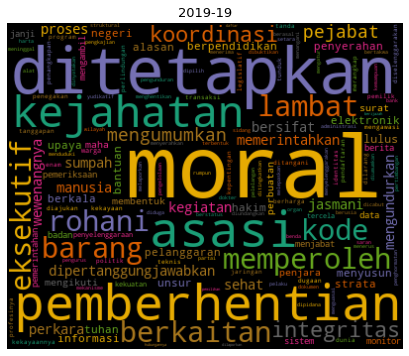

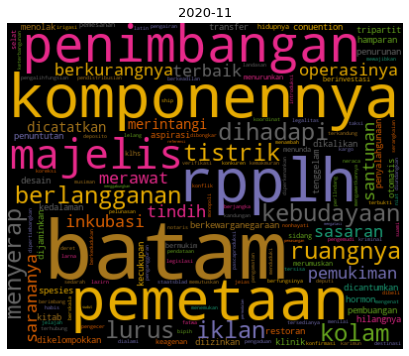

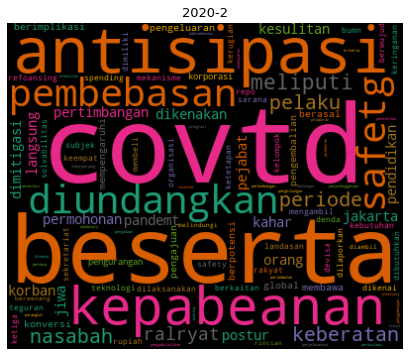

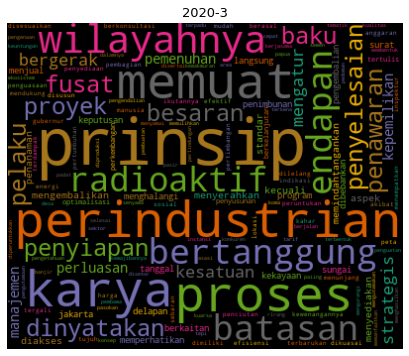

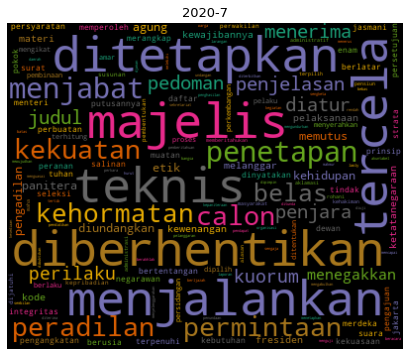

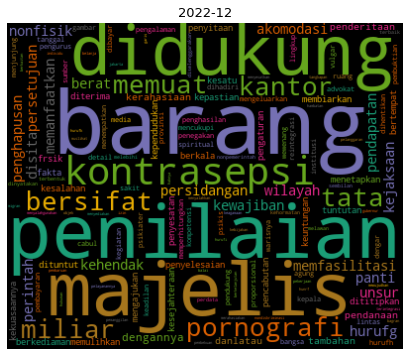

In [13]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

dir_wc ="D:/Portofolio/Indonesian-Controversial-Laws-Wordcloud/pickle/wc_image/"
# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(stopwords=s_word ,width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(16,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.savefig(dir_wc + title +".png", format="png") 
    plt.show() 



# Membuat wordcloud untuk setiap kategori yang ada
none_list = [] #creating list for none value document
for index,title in enumerate(law_stop_dtm.columns):
    #print(index)
    try:
        generate_wordcloud(law_stop_dtm[title].sort_values(ascending=False),law_title[index])
    except ZeroDivisionError:
        none_list.append(title)

In [14]:
# check none_list
print(none_list)

[]
